# Visualización de embeddings AE a baja escala

In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from shapely.geometry import box
from pyproj import Transformer

In [2]:
ae_emb = gpd.read_file("../data/embeddings_alpha_earth.gpkg")
ae_emb = gpd.GeoDataFrame(ae_emb, geometry=gpd.points_from_xy(ae_emb.lon, ae_emb.lat), crs="EPSG:4326")

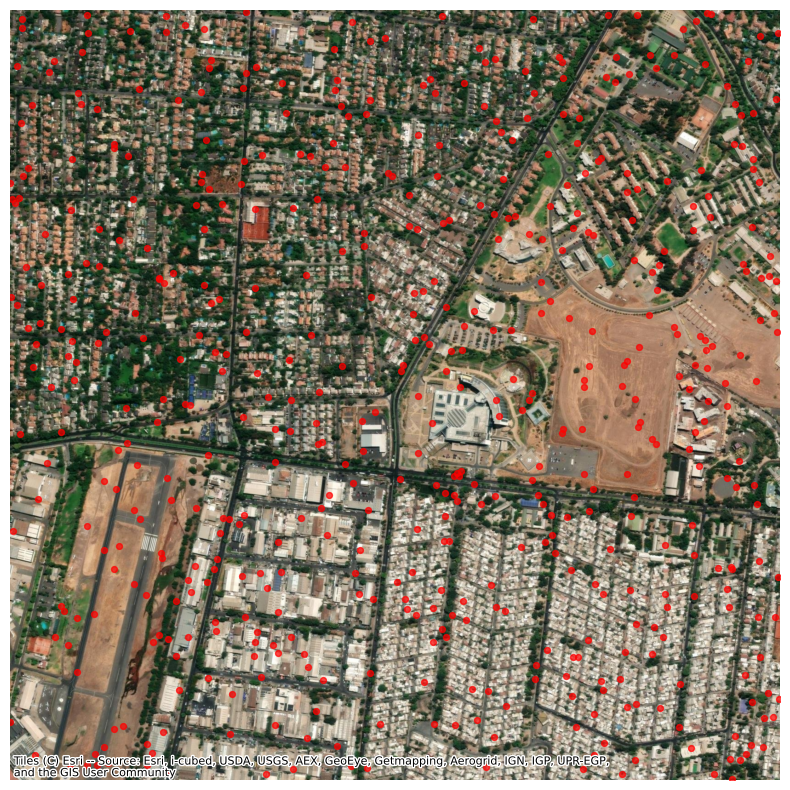

In [4]:
# --- Centro aproximado de La Reina ---
lon, lat = -70.54, -33.45
half_size_m = 1000  # 4 km

# --- Proyección a Web Mercator (para bbox y mapa base) ---
to_3857 = Transformer.from_crs("EPSG:4326", "EPSG:3857", always_xy=True)
x, y = to_3857.transform(lon, lat)

bbox = box(x - half_size_m, y - half_size_m, x + half_size_m, y + half_size_m)
gdf_bbox = gpd.GeoDataFrame(geometry=[bbox], crs="EPSG:3857")

# --- Reproyectar embeddings ---
ae_emb_3857 = ae_emb.to_crs("EPSG:3857")

# --- Filtrar puntos dentro del bbox ---
ae_emb_subset = ae_emb_3857[ae_emb_3857.within(bbox)]

# --- Plot ---
fig, ax = plt.subplots(figsize=(8, 8))

# 1) FIJA EL EXTENT PRIMERO
xmin, ymin, xmax, ymax = gdf_bbox.total_bounds
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

ctx.add_basemap(
    ax,
    source=ctx.providers.Esri.WorldImagery,
    zoom=17,
    crs="EPSG:3857"  # explícito para evitar ambigüedad
)

ae_emb_subset.plot(ax=ax, markersize=18, color="red", alpha=0.7)

ax.set_axis_off()
plt.tight_layout()
plt.show()
